<a href="https://colab.research.google.com/github/karon999/math/blob/main/HW1_error_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 1:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object `f` and its approximation `F`.  Note, both `f` and `F` can be numpy arrays.

In [244]:
def errors(f,F):
  """ calculate various measures of error of an object f and its approximation F

  Parameters
  ----------
  f:  numpy.array (or float)
      array of true values

  F: numpy.array
      array of approximate values

  Returns
  -------

  e: array of absolute errors
  r: array of relative errors
  p: integer array of precisions
  """
  e = numpy.abs(f - F)

  r = numpy.where(f != 0, e / numpy.abs(f), numpy.inf)

  p = numpy.where(r != 0, -numpy.log10(r / 5.), numpy.inf)
  p = numpy.where(p != numpy.inf, p.astype(int), numpy.inf)

  return e, r, p


In [245]:
# Testing Cell (do not copy)

# Test Simple Scalars
e,r,p = errors(numpy.exp(1),2.72)
answer = [0.0017181715409551046, 0.0006320799863232398, 3]
numpy.testing.assert_allclose([e,r,p], answer)
print('passed scalar test')

# Test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('passed array test')

passed scalar test
passed array test


**(b)** [2 pts]  Use your routine to compare the absolute error, relative error and degree of precision for these two rational approximations of $\pi$

* $f = \pi$ and $F = 22 / 7$
* $f = \pi$ and $F = 355 / 113$

Which is more accurate?

In [246]:
# you can put some working code here to generate your answers, but put your answers in the cell below
f = numpy.pi
F1 = 22 / 7
F2 = 355 / 113
e1,r1,p1 = errors(f,F1)
e2,r2,p2 = errors(f,F2)
if r1 > r2:
  print('F2 is more accurate')
elif r1 < r2:
  print('F1 is more accurate')
else:
  print('F1 and F2 are equally accurate')

F2 is more accurate


$F = 355 / 113$ is more accurate to approximate $\pi$

**(c)** [6 pts] Write a python routine to find the most accurate $d$ digit rational approximation to $\pi$. i.e. find
two $d$ digit positive integers $m,n$ such that

$$ F = \frac{m}{n} \sim \pi$$

(hint:  $355/113$ is the best 3-digit rational approximation)

In [247]:
def rational_pi(d):
  ''' Find the best rational approximation to pi ~ m/n where m and n are both d-digit positive integers

  Parameters
  ----------

  d: int
      number of digits in both m and n

  Returns
  -------
  m,n: int
      numerator and denominator of best d digit rational approximation to pi ~ m/n

  '''
  if d == 0:
    print('No 0 digit number is allowed.')
  else:
    min = 10**(d-1)
    max = 10**d - 1

    best_m = min
    best_n = 1
    best_error = 1000

    for n in range(min,max):
      m = round(numpy.pi * n)
      if min <= m <= max:
        error = abs(numpy.pi - m/n)
        if error < best_error:
          best_m = m
          best_n = n
          best_error = error

  return best_m, best_n

In [248]:
# Testing Cell (do not copy)

# print out best rational approximations and their errors  for d =1-5
for d in range(1,6):
  m,n = rational_pi(d)
  e,r,p = errors(numpy.pi,m/n)
  print('d={}: {}/{} = {}:\t e = {},\t, r = {},\t p= {}'.format(d,m,n,m/n,e,r,p))

# Run assertion Tests
numpy.testing.assert_allclose(rational_pi(2),(44, 14))
numpy.testing.assert_allclose(rational_pi(3),(355, 113))
print('\nsuccess!')


d=1: 3/1 = 3.0:	 e = 0.14159265358979312,	, r = 0.04507034144862795,	 p= 2.0
d=2: 44/14 = 3.142857142857143:	 e = 0.0012644892673496777,	, r = 0.0004024994347707008,	 p= 4.0
d=3: 355/113 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7.0
d=4: 3195/1017 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7.0
d=5: 99733/31746 = 3.1415926415926414:	 e = 1.1997151716514054e-08,	, r = 3.818811997413258e-09,	 p= 9.0

success!


**(d)** [6 pts] $F = n \log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$.
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

**Note**: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  

**Hint**: However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

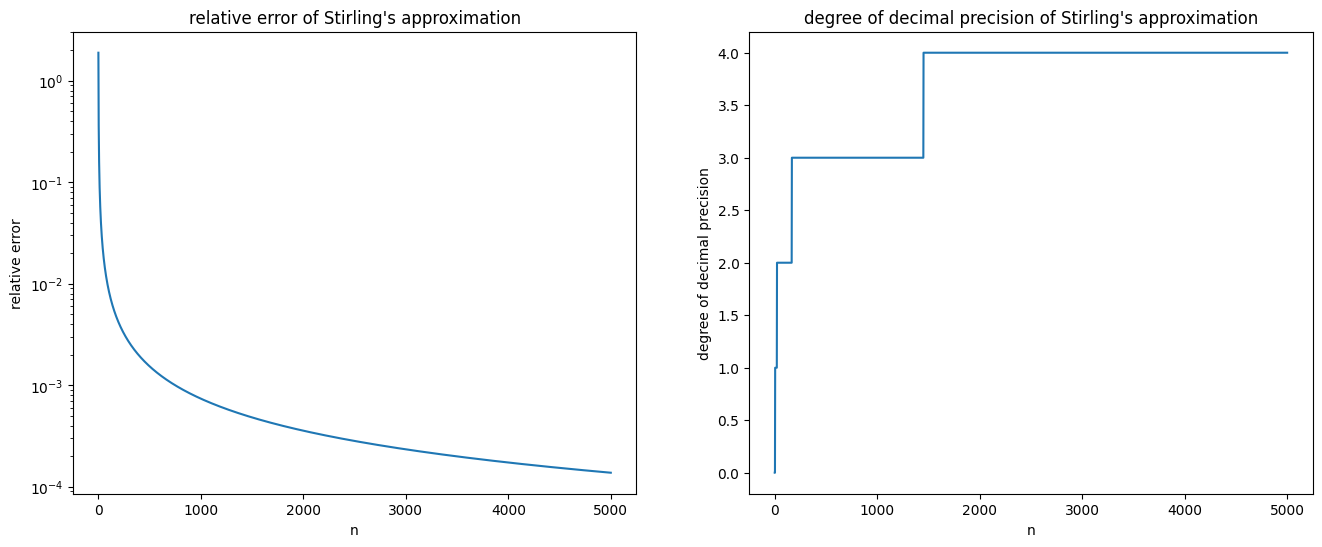

The smallest value of n where Stirling's approximation is good to 4 decimal places of precision is: 1452


In [249]:
from scipy.special import gammaln

n = numpy.arange(2,5000)
f = gammaln(n + 1)
F = n * numpy.log(n) - n

relative_error = numpy.abs(f - F) / numpy.abs(f)
precision = -numpy.log10(relative_error/5.)
precision = precision.astype(int)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(n, relative_error, label="relative error")
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('relative error')
plt.title('relative error of Stirling\'s approximation')

plt.subplot(1, 2, 2)
plt.plot(n, precision, label="degree of decimal precision")
plt.xlabel('n')
plt.ylabel('degree of decimal precision')
plt.title('degree of decimal precision of Stirling\'s approximation')

plt.show()

n_min = numpy.min(n[precision >= 4])
print(f"The smallest value of n where Stirling's approximation is good to 4 decimal places of precision is: {n_min}")



1452

## Question 2

[4 pts] Given the Taylor polynomial expansions of two functions around $x=0$

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

calculate their sum and product as well as the order of approximation for the truncation error (i.e. determine the exponent that belongs in the $O$).


$Sum = 2 + \Delta x + \frac{3}{2}\Delta x^2 + \Delta x^3 + O(\Delta x^4)$
<br><br>
$Production = 1 + \Delta x + \frac{3}{2}\Delta x^2 + \frac{3}{2}\Delta x^3 + O(\Delta x^4)$

## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

$R_n(x) = e^x - T_n(x)
= \frac{f^{(n+1)}(c) * (x-x_0)^{n+1}} {(n+1)!}
= \frac{e^c*x^{n+1}}{(n+1)!}$
<br><br>
$r_n = \frac{|e^x - T_n(x)|}{|e^x|} = \frac{|R_n|}{|e^x|} = \frac{e^c}{e^x} * \left| \frac{x^{x+1}}{(n+1)!} \right|$
<br><br>
$c \in [x_0,x] \implies
\frac{e^c}{e^x} \leq 1 \implies
r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$


**(b)** [4 pts] Analytically show that for **large** $x\gg1$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need *approximately* $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$ (and then this problem is still a bit tricky)

$\log(n!) \approx n \log n - n
\implies log((n+1)!) \approx (n+1)log(n+1) - (n+1)$
<br><br>
$r_n \leq \epsilon_{\text{machine}}
\iff (n+1) \log x - \log((n+1)!) \leq \log(\epsilon_{\text{machine}})$<br>
$\iff (n+1) \log x - [(n+1) \log(n+1) - (n+1)] \leq \log(\epsilon_{\text{machine}})$<br>
$\iff (n+1)[\log x - \log(n+1) + 1] \leq \log(\epsilon_{\text{machine}})$
<br><br>
For large $x\gg1$ and $n$, $n+1 \approx n$, $\log(\epsilon_{\text{machine}}) \approx 0$,<br>
the above equation $\implies n(\log x - \log n + 1) < 0 \implies log(\frac{n}{x}) > 1
\implies n > e*x$

**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $T_n(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_n(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [250]:
def Tn_exp(x):
  """ Write a decent description here

  Parameters:
  -----------
      x: float
          scalar value to approximate exp(x)
  """

  assert(isinstance(x,float))

  if x < 0:
    Tn_rec, MAX_N = Tn_exp(-x)
    return 1 / Tn_rec, MAX_N
  else:
    # rough estimate of maximum number of steps for large x
    if abs(x) <= 50:
      max = int(abs(50) * numpy.exp(1))
    else:
      max = int(abs(x) * numpy.exp(1))

    MAX_N = 1

    Tn = 1.0
    term = Tn
    tol = 8 * numpy.finfo(float).eps

    for n in range(1, max):
      term *= x / n
      Tn += term
      r = numpy.abs(Tn - numpy.exp(x)) / numpy.abs(numpy.exp(x))
      if r < tol:
        #print('ok')
        MAX_N = n
        return Tn, MAX_N

    return False

In [251]:
# Feel free to test your code here and/or make a plot of errors
x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
  answer[i], N[i] = Tn_exp(xi)
print(N)

[114. 114. 112. 111. 109. 107. 105. 104. 102. 101.  99.  97.  96.  94.
  92.  91.  89.  87.  86.  84.  82.  81.  79.  77.  75.  73.  72.  70.
  68.  66.  64.  62.  60.  58.  57.  54.  52.  50.  48.  46.  44.  41.
  39.  37.  34.  31.  28.  25.  21.  16.   1.  16.  21.  25.  28.  31.
  34.  37.  39.  41.  44.  46.  48.  50.  52.  54.  57.  58.  60.  62.
  64.  66.  68.  70.  72.  73.  75.  77.  79.  81.  82.  84.  86.  87.
  89.  91.  92.  94.  96.  97.  99. 101. 102. 104. 105. 107. 109. 111.
 112. 114. 114.]


In [252]:
# Testing Cell (do not copy)

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
  answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 7.86815921514346 eps_machine
Success!


**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`.

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

In [253]:
f = numpy.exp(709)
eps = numpy.finfo(float).eps

F1,N = Tn_exp(709.0)
e1 = numpy.abs(f - F1)
r1 = numpy.abs(f - F1) / numpy.abs(f)

F2 = numpy.exp(1)**709
e2 = numpy.abs(f - F2)
r2 = numpy.abs(f - F2) / numpy.abs(f)

print('relative error for my routine and f=numpy.exp(709) ={} machine epsilon '.format(r1/eps))
print('relative error for F=numpy.exp(1)**709 and f=numpy.exp(709) ={} machine epsilon '.format(r2/eps))

relative error for my routine and f=numpy.exp(709) =4.374796804056686 machine epsilon 
relative error for F=numpy.exp(1)**709 and f=numpy.exp(709) =170.0702257577037 machine epsilon 


The relative error in units of machine epsilon for my routine and `f=numpy.exp(709)` is 4.374796804056686.

The relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)` is 170.0702257577037.

**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [254]:
import mpmath
def Tn_exp(x,tolerance):
  """ Write a decent description here

  Parameters:
  -----------
      x: float
          scalar value to approximate exp(x)
  """
  mpmath.mp.dps = 50
  x = mpmath.mpf(x)

  if x < 0:
    #print('negative')
    Tn_rec, MAX_N = Tn_exp(-x,tolerance)
    return 1 / Tn_rec, MAX_N
  else:
    # rough estimate of maximum number of steps for large x
    if abs(x) <= 50:
      max = int(abs(50) * numpy.exp(1))
      #print('small number')
    else:
      max = int(abs(x) * numpy.exp(1))
      #print('large number', x)

    MAX_N = 1

    Tn = mpmath.mpf(1.0)
    term = mpmath.mpf(1.0)
    tol = mpmath.mpf(tolerance/2)

    for n in range(1, max):
      term *= x / n
      Tn += term
      r = numpy.abs(Tn - mpmath.exp(x)) / numpy.abs(mpmath.exp(x))
      r = mpmath.mpf(r)
      #print(x,n,r)
      #print(term,Tn,e)
      if r < tol:
        #print(x, 'ok')
        #print(r)
        MAX_N = n
        return Tn, MAX_N

    return False

In [255]:
x = numpy.linspace(-709, 709, 101)
eps = numpy.finfo(float).eps
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
  answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 8.24566065936277 eps_machine
Success!


## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-3, 3]$ (and we'll pretend DNA has a sign bit...chirality?).

**(a)** [4 pts] How many numbers can we represent with this floating point system (assume it's normalized)?  What are the underflow and overflow limits? What is machine Epsilon?

In [256]:
3 * 4 * 4 * 2 * 7
4 ** (-3)
3 * 4 ** 3 + 3 * 4 ** 2 + 3 * 4
#4 ** (1 - 3)

252

We can represent $3*4*4*2*7 = 672$ numbers with this floating point system (assume it's normalized).

The underflow is $1*4^{-3} = 0.015625$ and the overflow is $3 * 4^3 + 3 * 4^2 + 3 * 4 = 252$.

The machine Epsilon is $4^{(1-3)} = 0.0625$.

**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

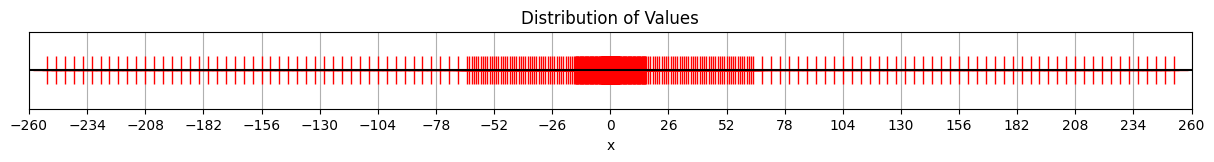

In [257]:
d_1_values = [1, 2, 3]
d_2_values = [0, 1, 2, 3]
d_3_values = [0, 1, 2, 3]
E_values = [-3, -2, -1, 0, 1, 2, 3]

fig = plt.figure(figsize=(15, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
  for d1 in d_1_values:
    for d2 in d_2_values:
      for d3 in d_3_values:
        axes.plot((d1 + d2 * 1/4 + d3 * 1/16) * 4**E, 0.0, 'r+', markersize=20)
        axes.plot(-(d1 + d2 * 1/4 + d3 * 1/16) * 4**E, 0.0, 'r+', markersize=20)

axes.plot(0.0, 0.0, 'r+', markersize=20)
axes.plot([-260, 260], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xticks(numpy.linspace(-260, 260, 21))
axes.set_xlabel("x")
axes.set_ylabel("")
axes.grid()
axes.set_xlim([-260, 260])
plt.show()


**(c)** [4 pts] How many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g.  p=3, and $E\in[-3,3]$ for both problems)?

$N_4 = 3*4*4*2*7 = 672$

$N_2 = 1*2*2*2*7 = 56$

we can store $672 - 56 = 616$ more numbers in  N  base-pairs (base 4) versus  N  bits (base 2) where the mantissa and exponent are the same relative length (e.g. p=3, and  E∈[−3,3]  for both problems).